This script imports the open rocket export of flight data of a rocket of approximately the same size and shape as the U Waterloo rocket for the 10k SRAD hybrid category attempt in 2018. 

Using the drag coefficients, I detetermine the polynomial fit of drag coefficient against mach number. 
It works well if using 3 segments, between 0 -> 1, 1 -> 1.25, 1.25 -> 2. The last segment could be extended upto about mach 3, but there is no data here. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UWaterloo_approximate_model.csv')

In [4]:
df.head()

,# Time (s),Altitude (m),Vertical velocity (m/s),Vertical acceleration (m/s²),Total velocity (m/s),Total acceleration (m/s²),Position East of launch (m),Position North of launch (m),Lateral distance (m),Lateral direction (°),...,Reference length (cm),Reference area (cm²),Vertical orientation (zenith) (°),Lateral orientation (azimuth) (°),Wind velocity (m/s),Air temperature (°C),Air pressure (mbar),Speed of sound (m/s),Simulation time step (s),Computation time (s)
0,0.00,0.000000,0.00000,39.751,0.0000,39.97,0.000000,0.0,0.000000,0.0,...,15.24,182.41,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.002643
1,0.01,0.001988,0.39751,138.630,0.3997,139.39,0.000209,0.0,0.000209,0.0,...,15.24,182.41,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.003241
2,0.02,0.012895,1.78400,237.550,1.7938,238.86,0.001355,0.0,0.001355,0.0,...,15.24,182.41,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.003728
3,0.03,0.042614,4.15990,317.910,4.1828,319.66,0.004479,0.0,0.004479,0.0,...,15.24,182.41,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.004232
4,0.04,0.100110,7.33950,324.560,7.3799,326.35,0.010522,0.0,0.010522,0.0,...,15.24,182.41,84.0,0.0,NaN,14.674,1007.4,340.19,0.01,0.004862


In [6]:
df.columns

Index(['# Time (s)', 'Altitude (m)', 'Vertical velocity (m/s)',
       'Vertical acceleration (m/s²)', 'Total velocity (m/s)',
       'Total acceleration (m/s²)', 'Position East of launch (m)',
       'Position North of launch (m)', 'Lateral distance (m)',
       'Lateral direction (°)', 'Lateral velocity (m/s)',
       'Lateral acceleration (m/s²)', 'Latitude (°)', 'Longitude (°)',
       'Gravitational acceleration (m/s²)', 'Angle of attack (°)',
       'Roll rate (°/s)', 'Pitch rate (°/s)', 'Yaw rate (°/s)', 'Mass (g)',
       'Propellant mass (g)', 'Longitudinal moment of inertia (kg·m²)',
       'Rotational moment of inertia (kg·m²)', 'CP location (cm)',
       'CG location (cm)', 'Stability margin calibers (​)', 'Mach number (​)',
       'Reynolds number (​)', 'Thrust (N)', 'Drag force (N)',
       'Drag coefficient (​)', 'Axial drag coefficient (​)',
       'Friction drag coefficient (​)', 'Pressure drag coefficient (​)',
       'Base drag coefficient (​)', 'Normal force coeffic

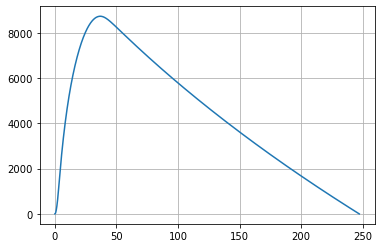

In [17]:
plt.plot(df['# Time (s)'], df['Altitude (m)'])
plt.grid(True)

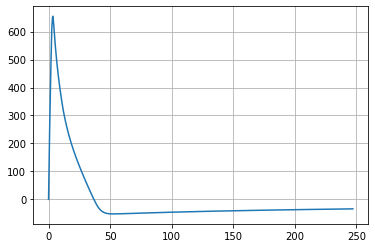

In [18]:
plt.plot(df['# Time (s)'], df['Vertical velocity (m/s)'])
plt.grid(True)

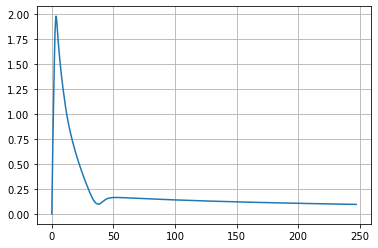

In [16]:
plt.plot(df['# Time (s)'], df['Mach number (\u200b)'])
plt.grid(True)

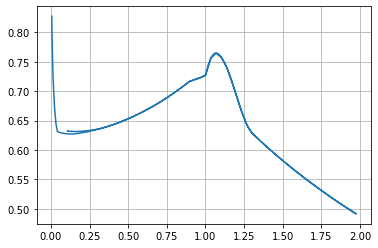

In [11]:
plt.plot(df['Mach number (\u200b)'], df['Drag coefficient (​)'])
plt.grid(True)

In [120]:
inds = df['Vertical velocity (m/s)']>0
df2 = df[inds]

inds = df2['Mach number (\u200b)']>0.1 
dfsub = df2[inds]
inds = dfsub['Mach number (\u200b)']<1
dfsub = dfsub[inds]

inds = df2['Mach number (\u200b)']>1 
dftrans = df2[inds]
inds = dftrans['Mach number (\u200b)']<1.25
dftrans = dftrans[inds]

inds = df2['Mach number (\u200b)']>1.25
dfsuper = df2[inds]

In [66]:
df3.head()

,# Time (s),Altitude (m),Vertical velocity (m/s),Vertical acceleration (m/s²),Total velocity (m/s),Total acceleration (m/s²),Position East of launch (m),Position North of launch (m),Lateral distance (m),Lateral direction (°),...,Reference length (cm),Reference area (cm²),Vertical orientation (zenith) (°),Lateral orientation (azimuth) (°),Wind velocity (m/s),Air temperature (°C),Air pressure (mbar),Speed of sound (m/s),Simulation time step (s),Computation time (s)
13,0.13,2.0661,36.225,316.22,36.425,317.96,0.21715,0.0,0.21715,0.0,...,15.24,182.41,84.0,0.0,NaN,14.662,1007.1,340.18,0.01,0.009199
14,0.14,2.4441,39.388,315.27,39.605,317.01,0.25689,0.0,0.25689,0.0,...,15.24,182.41,84.0,0.0,NaN,14.659,1007.1,340.18,0.01,0.010461
15,0.15,2.8538,42.541,314.32,42.776,316.05,0.29995,0.0,0.29995,0.0,...,15.24,182.41,84.0,0.0,NaN,14.656,1007.1,340.18,0.01,0.011255
16,0.16,3.2949,45.685,313.36,45.937,315.09,0.34631,0.0,0.34631,0.0,...,15.24,182.41,84.0,0.0,NaN,14.654,1007.0,340.18,0.01,0.015178
17,0.17,3.7674,48.819,312.40,49.088,314.12,0.39597,0.0,0.39597,0.0,...,15.24,182.41,84.0,0.0,NaN,14.651,1006.9,340.18,0.01,0.015698


In [147]:
(((df3["Reference area (cm²)"].mean())/np.pi)**0.5)*(1/2.54)

2.999961413426626

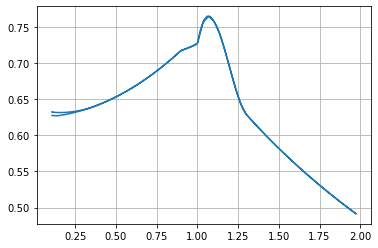

In [121]:
plt.plot(df3['Mach number (\u200b)'], df3['Drag coefficient (​)'])
plt.grid(True)

In [138]:
coeffs_sub = np.polynomial.polynomial.polyfit(x = dfsub['Mach number (\u200b)'], y=dfsub['Drag coefficient (\u200b)'], deg = 2)
print(coeffs_sub)

coeffs_trans = np.polynomial.polynomial.polyfit(x = dftrans['Mach number (\u200b)'], y=dftrans['Drag coefficient (\u200b)'], deg = 2)
print(coeffs_trans)

coeffs_super = np.polynomial.polynomial.polyfit(x = dfsuper['Mach number (\u200b)'], y=dfsuper['Drag coefficient (\u200b)'], deg = 2)
print(coeffs_super)

[ 0.62974538 -0.01151512  0.11773826]
[-3.52610503  7.99357459 -3.72820877]
[ 1.09641739 -0.45894398  0.07741472]


In [136]:
machs_sub = np.linspace(0,1)
cd_sub = np.polynomial.polynomial.polyval(machs_sub,coeffs_sub)

machs_trans = np.linspace(1, 1.25)
cd_trans = np.polynomial.polynomial.polyval(machs_trans,coeffs_trans)

machs_super = np.linspace(1.25,2)
cd_super = np.polynomial.polynomial.polyval(machs_super,coeffs_super)

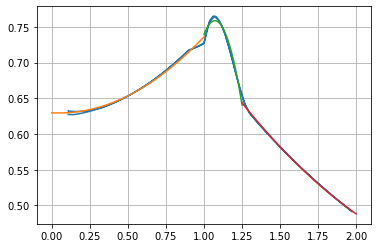

In [137]:
plt.plot(df3['Mach number (\u200b)'], df3['Drag coefficient (​)'])
plt.plot(machs_sub,cd_sub)
plt.plot(machs_trans,cd_trans)
plt.plot(machs_super,cd_super)
plt.grid(True)